In [1]:
!pip install geopy

In [2]:
!pip install folium

     |████████████████████████████████| 92kB 13.1MB/s eta 0:00:01


In [3]:
# The code was removed by Watson Studio for sharing.

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - seaborn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    seaborn-0.10.0             |             py_0         161 KB  anaconda
    certifi-2020.4.5.1         |           py36_0         159 KB  anaconda
    openssl-1.1.1              |       h7b6447c_0         5.0 MB  anaconda
    ca-certificates-2020.1.1   |                0         132 KB  anaconda
    ------------------------------------------------------------
                                           Total:         5.5 MB

The following packages will be UPDATED:

    ca-certificates: 2020.1.1-0         --> 2020.1.1-0        anaconda
    certifi:         2020.4.5.1-py36_0  --> 2020.4.5.1-py36_0 anaconda
    openssl:         1.1.1f-h7b6447c_0  --> 1.1.1-h7b6447c_0  anaconda
    seaborn:         0.9.0-pyh91

In [36]:

body = client_31e6f82151c3407d838931ce2a9b0267.get_object(Bucket='capstoneprojectthebattleofneighbo-donotdelete-pr-udaf8sgdipthiy',Key='DOHMH_Farmers_Markets.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

# If you are reading an Excel file into a pandas DataFrame, replace `read_csv` by `read_excel` in the next statement.
fm_nyc = pd.read_csv(body)
fm_nyc.head()


,Borough,Market Name,Service Category,Service Type,Street Address,Latitude,Longitude,Days of Operation,Hours of Operations,Season Dates,Accepts EBT,Open Year-Round,Stellar Cooking Demonstrations,Food Activities for Kids,Location Point
0,Brooklyn,Woodhull Hospital Youthmarket,Farmers Markets and Food Boxes,Farmers Markets,Broadway & Flushing Ave,40.700726,-73.941932,Wednesday,9 a.m. - 2 p.m.,07/10/2019-11/27/2019,Yes,No,No,No,"(40.700726, -73.941932)"
1,Manhattan,Mount Sinai Hospital Greenmarket,Farmers Markets and Food Boxes,Farmers Markets,E 99th St bet Madison & Park Aves,40.789169,-73.952743,Wednesday,8 a.m. - 5 p.m.,06/12/19-11/27/19,Yes,No,No,No,"(40.789169, -73.952743)"
2,Bronx,170 Farm Stand,Farmers Markets and Food Boxes,Food Boxes,E 170th St & Townsend Ave,40.839882,-73.916783,Wednesday,2:30 - 6:30 p.m.,07/10/2019-11/27/2019,Yes,No,No,Yes,"(40.839882, -73.916783)"
3,Manhattan,Greenmarket at Oculus Plaza,Farmers Markets and Food Boxes,Farmers Markets,"Church & Fulton Sts, on Oculus Plaza",40.711535,-74.010464,Tuesday,7 a.m. - 7 p.m.,07/09/2019-11/30/19,Yes,Yes,No,No,"(40.711535, -74.010464)"
4,Queens,Ditmars Park Youthmarket,Farmers Markets and Food Boxes,Farmers Markets,"Steinway St bet Ditmars Blvd & 23rd Ave, at Di...",40.772854,-73.906061,Saturday,8 a.m. - 3 p.m.,07/13/2019-11/23/2019,Yes,No,No,No,"(40.772854, -73.906061)"


In [37]:
fm_nyc.rename(columns={'Service Type':'Service_Type'}, inplace=True)
fm_nyc.rename(columns={'Market Name':'FacilityName'}, inplace=True)
print(fm_nyc.Service_Type.unique())

['Farmers Markets' 'Food Boxes']


In [38]:
fm_nyc['Service_Type'].value_counts().to_frame()

,Service_Type
Farmers Markets,121
Food Boxes,17


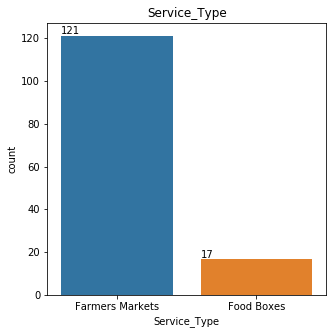

In [39]:
fig,ax = plt.subplots(1, 1, figsize=(5, 5))
sns.countplot(x='Service_Type',data=fm_nyc)
ax.set_title("Service_Type")
for t in ax.patches:
    if (np.isnan(float(t.get_height()))):
        ax.annotate('', (t.get_x(), 0))
    else:
        ax.annotate(str(format(int(t.get_height()), ',d')), (t.get_x(), t.get_height()*1.01))
    
plt.show();

In [40]:
# FM_NYC_filtered - Dataset with only Farmers Market
FM_NYC_filtered = fm_nyc[fm_nyc['Service_Type'] == 'Farmers Markets'].copy()
FM_NYC_filtered ['Borough'] = FM_NYC_filtered['Borough'].map(lambda x: x.strip())
print(FM_NYC_filtered.shape)
FM_NYC_filtered.head()

(121, 15)


,Borough,FacilityName,Service Category,Service_Type,Street Address,Latitude,Longitude,Days of Operation,Hours of Operations,Season Dates,Accepts EBT,Open Year-Round,Stellar Cooking Demonstrations,Food Activities for Kids,Location Point
0,Brooklyn,Woodhull Hospital Youthmarket,Farmers Markets and Food Boxes,Farmers Markets,Broadway & Flushing Ave,40.700726,-73.941932,Wednesday,9 a.m. - 2 p.m.,07/10/2019-11/27/2019,Yes,No,No,No,"(40.700726, -73.941932)"
1,Manhattan,Mount Sinai Hospital Greenmarket,Farmers Markets and Food Boxes,Farmers Markets,E 99th St bet Madison & Park Aves,40.789169,-73.952743,Wednesday,8 a.m. - 5 p.m.,06/12/19-11/27/19,Yes,No,No,No,"(40.789169, -73.952743)"
3,Manhattan,Greenmarket at Oculus Plaza,Farmers Markets and Food Boxes,Farmers Markets,"Church & Fulton Sts, on Oculus Plaza",40.711535,-74.010464,Tuesday,7 a.m. - 7 p.m.,07/09/2019-11/30/19,Yes,Yes,No,No,"(40.711535, -74.010464)"
4,Queens,Ditmars Park Youthmarket,Farmers Markets and Food Boxes,Farmers Markets,"Steinway St bet Ditmars Blvd & 23rd Ave, at Di...",40.772854,-73.906061,Saturday,8 a.m. - 3 p.m.,07/13/2019-11/23/2019,Yes,No,No,No,"(40.772854, -73.906061)"
5,Bronx,CS211 Go!Healthy Farm Stand,Farmers Markets and Food Boxes,Farmers Markets,1919 Prospect Ave,40.843546,-73.889755,Wednesday,2:30 - 5:30 p.m.,07/08/2019- 11/22/2019,Yes,No,No,No,"(40.843546, -73.889755)"


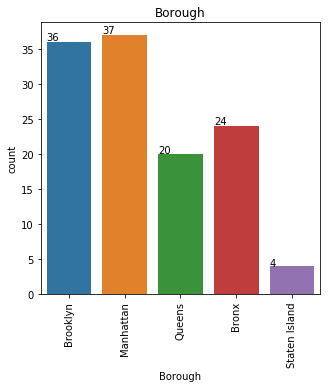

In [41]:
fig,ax = plt.subplots(1, 1, figsize=(5, 5))
sns.countplot(x='Borough',data=FM_NYC_filtered)
ax.set_title("Borough")
for t in ax.patches:
    if (np.isnan(float(t.get_height()))):
        ax.annotate('', (t.get_x(), 0))
    else:
        ax.annotate(str(format(int(t.get_height()), ',d')), (t.get_x(), t.get_height()*1.01))
        ax.set_xticklabels([t.get_text().split("T")[0] for t in ax.get_xticklabels()])

# This sets the yticks "upright" with 0, as opposed to sideways with 90.
plt.xticks(rotation=90) 
plt.show()

In [42]:
address = 'New York City, NY'

geolocator = Nominatim(user_agent="Jupyter")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of New York City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of New York City are 40.7127281, -74.0060152.


In [43]:
#create map of New York City using latitude and longitude values
map_markets = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, FacilityName, borough in zip(FM_NYC_filtered['Latitude'], FM_NYC_filtered['Longitude'], FM_NYC_filtered['FacilityName'], FM_NYC_filtered['Borough']):
            label = '{}, {}'.format(FacilityName, borough)
            label = folium.Popup(label, parse_html=True)
            folium.CircleMarker(
                [lat, lng],
                radius=5,
                popup=label,
                color='green',
                fill=True,
                fill_color='green',
                fill_opacity=0.7,
                parse_html = False).add_to(map_markets)  

map_markets